In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

### Split the Data into Training and Testing Sets.

### Step 1: Read the csv data from the Resources folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv('../Resources/cleaned_df.csv')

# Review the DataFrame
lending_data_df.head()

,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel,Year,Month,Day,Cost per Day,ZIP
0,1,20111.0,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13,2022,9,13,20111.000000,71371
1,5,29681.0,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04,2021,9,4,5936.200000,27800
2,7,24950.0,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25,2021,1,25,3564.285714,32510
3,19,18676.0,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28,2022,1,28,982.947368,26739
4,28,18899.0,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21,2021,10,21,674.964286,46541


### Step 2: Create the labels set (y) from the Cost column, and then create the features (X) DataFrame from the remaining columns.

Using Cost of Travel(Entire Trip) results in the error: ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### Step 2: Create the labels set (y) from the Duration column, and then create the features (X) DataFrame from the remaining columns.

In [3]:
# Separate the y variable, the labels
y = lending_data_df['Duration']

# Separate the X variable, the features
X = lending_data_df.drop(["Duration", "Stay", "Mode of Travel", "First Name", "Last Name", "Address", "Date of Birth", "Sex", "Nationality", "Date of Travel" ], axis=1)

In [4]:
# Review the y variable Series
y[:5]

0     1
1     5
2     7
3    19
4    28
Name: Duration, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,Cost of Travel(Entire Trip) in Euros,Age,Year,Month,Day,Cost per Day,ZIP
0,20111.0,74,2022,9,13,20111.000000,71371
1,29681.0,19,2021,9,4,5936.200000,27800
2,24950.0,36,2021,1,25,3564.285714,32510
3,18676.0,38,2022,1,28,982.947368,26739
4,18899.0,38,2021,10,21,674.964286,46541


In [6]:
# Check the balance of target values
y.value_counts()

Duration
18    114
16    112
26    111
6     111
8     110
22    109
27    109
9     106
15    105
13    104
30    104
28    104
14    103
25    103
12    103
7     101
4     101
1     101
24    101
29     98
2      97
21     93
11     93
20     93
19     93
3      88
23     87
17     86
10     85
5      75
Name: count, dtype: int64

### Step 3: Split the data into training and testing datasets by using train_test_split.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### Create a Logistic Regression Model with the Original Data.

### Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [10]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Predictions": predictions,"Actual": y_test})

,Predictions,Actual
1463,15,14
1381,20,17
879,30,28
1733,29,23
2707,29,23
...,...,...
1038,18,18
2007,25,23
1988,28,26
1769,28,25


#### Step 3: Evaluate the model’s performance by doing the following:
- Generate a confusion matrix.

- Print the classification report.

In [11]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  

In [12]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        19
           6       0.80      1.00      0.89        28
           7       1.00      0.72      0.84        25
           8       0.93      0.89      0.91        28
           9       0.58      0.56      0.57        27
          10       0.38      0.43      0.40        21
          11       0.67      0.35      0.46        23
          12       0.19      0.23      0.21        26
          13       0.20      0.42      0.27        26
          14       0.17      0.12      0.14        26
          15       0.14      0.12      0.13        26
          16       0.14      0.14      0.14        28
          17       0.13      0.09      0.11        22
          18       0.21    

/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

### Other Predictions

Mean Squared Error: 54459130.528756365
R-squared: 0.0022064295355311847


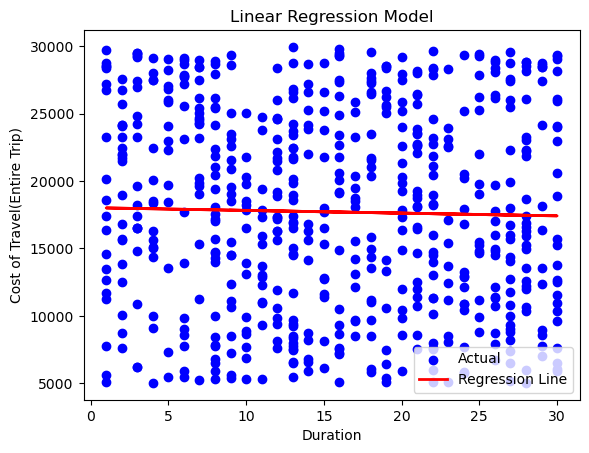

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("../Resources/cleaned_df.csv")

# Data preprocessing (One-hot encoding for categorical variables)
data = pd.get_dummies(data, columns=["Mode of Travel", "Stay", "Sex", "Nationality"])

# Select features and target
X = data[["Duration"]]
y = data["Cost of Travel(Entire Trip) in Euros"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Scatter plot of the data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel("Duration")
plt.ylabel("Cost of Travel(Entire Trip)")
plt.title("Linear Regression Model")

# Display the legend
plt.legend()

# Save the plot to a PNG file
plt.savefig("LinearRegressionModel.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [17]:
# Review the DataFrame
data.head()

,Duration,Cost of Travel(Entire Trip) in Euros,First Name,Last Name,Date of Birth,Address,Age,Date of Travel,Year,Month,...,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wallis and Futuna,Nationality_Western Sahara,Nationality_Yemen,Nationality_Zambia,Nationality_Zimbabwe
0,1,20111.0,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,2022-09-13,2022,9,...,False,False,False,False,False,False,False,False,False,False
1,5,29681.0,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,2021-09-04,2021,9,...,False,False,False,False,False,False,False,False,False,False
2,7,24950.0,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,2021-01-25,2021,1,...,False,False,False,False,False,False,False,False,False,False
3,19,18676.0,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,2022-01-28,2022,1,...,False,False,False,False,False,False,False,False,False,False
4,28,18899.0,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,2021-10-21,2021,10,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# You can also use this model to make predictions for new data points
# new_data = pd.DataFrame({"Duration": [10, 20, 30]})
# new_predictions = model.predict(new_data)

### Predict "Duration" based on "Cost of Travel(Entire Trip)":

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("../Resources/cleaned_df.csv")

# Select features and target
X_duration = data[["Cost of Travel(Entire Trip) in Euros"]]
y_duration = data["Duration"]

# Create and train the linear regression model
duration_model = LinearRegression()
duration_model.fit(X, y)


LinearRegression()

/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cost of Travel(Entire Trip) in Euros
Feature names seen at fit time, yet now missing:
- Duration

  warnings.warn(message, FutureWarning)


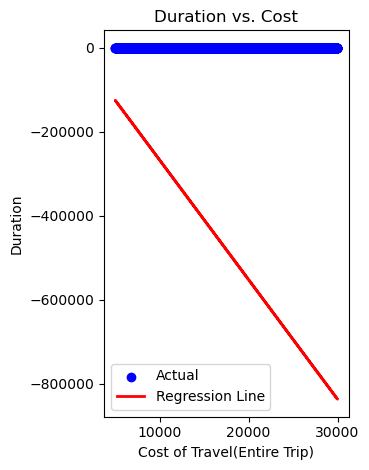

In [19]:
# Scatter plot of the data points for predicting Duration based on Cost
plt.subplot(121)
plt.scatter(X_duration, y_duration, color='blue', label='Actual')
plt.plot(X_duration, duration_model.predict(X_duration), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Cost of Travel(Entire Trip)")
plt.ylabel("Duration")
plt.title("Duration vs. Cost")
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig("DurationvsCost.png", dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

### Predict "Cost of Travel(Entire Trip)" based on "Duration":

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("../Resources/cleaned_df.csv")

# Select features and target
X_cost = data[["Duration"]]
y_cost = data["Cost of Travel(Entire Trip) in Euros"]

# Create and train the linear regression model
cost_model = LinearRegression()
cost_model.fit(X, y)


LinearRegression()

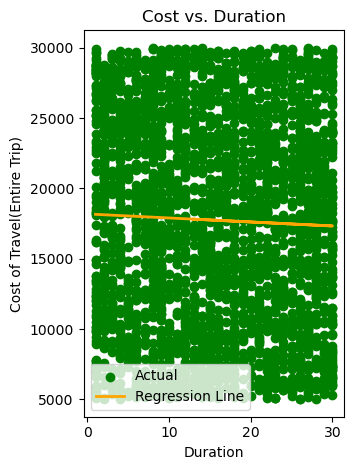

In [22]:
# Scatter plot of the data points for predicting Cost based on Duration
plt.subplot(122)
plt.scatter(X_cost, y_cost, color='green', label='Actual')
plt.plot(X_cost, cost_model.predict(X_cost), color='orange', linewidth=2, label='Regression Line')
plt.xlabel("Duration")
plt.ylabel("Cost of Travel(Entire Trip)")
plt.title("Cost vs. Duration")
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig("CostvsDuration.png", dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

### Predict the price of a X-day stay using a linear regression model.

In [23]:
# Assuming the cost_model is already trained
# Replace 'your_duration_value' with the duration of X days for prediction
duration_input = [[25]]

# Predict the cost for a 25-day stay
predicted_cost = cost_model.predict(duration_input)

print(f"Predicted Cost for a 25-day stay: ${predicted_cost[0]:.2f}")


Predicted Cost for a 25-day stay: $17475.93


/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Result summary:

The dataset is synthetic so the data is randomized and is causing the accuracy to be uniform across variables, making it difficult to increase the accuracy and make better predictions.